# A/B Test: New Trading Interface

## Objective
Evaluate whether a redesigned trading interface increases user conversion rate.

## Hypothesis

H0 (Null): There is no difference in conversion rate between control and treatment.

H1 (Alternative): The new interface increases conversion rate.

Primary Metric: Trade Conversion Rate
Significance Level: α = 0.05

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n = 2000

# Randomly assign users to control or treatment group
group = np.random.choice(["control", "treatment"], size=n)

# Simulate conversion rates
conversion = []

for g in group:
    if g == "control":
        conversion.append(np.random.binomial(1, 0.12)) # 12% conversion
    else:
        conversion.append(np.random.binomial(1, 0.15)) # 15% conversion
        
data = pd.DataFrame({
    "group": group,
    "converted": conversion 
})

data.head()


,group,converted
0,control,0
1,treatment,0
2,control,0
3,control,0
4,control,0


In [11]:
# Calculate conversion rates
conversion_rates = data.groupby("group")["converted"].mean()
conversion_rates

group
control      0.120079
treatment    0.149390
Name: converted, dtype: float64

In [12]:
# Statistical test
# Since conversion is binary, we use two-proportion z-test
control = data[data["group"] == "control"]["converted"]
treatment = data[data["group"] == "treatment"]["converted"]

n_control = len(control)
n_treatment = len(treatment)

p_control = control.mean()
p_treatment = treatment.mean()

# pooled probability
p_pool = (control.sum() + treatment.sum()) / (n_control + n_treatment)

# standard error
se = np.sqrt(p_pool * (1 - p_pool) * (1/n_control + 1/n_treatment))

# z-score
z = (p_treatment - p_control) / se

# two-tailed p-value
from math import erf, sqrt

p_value = 2 * (1 - 0.5 * (1 + erf(abs(z)/sqrt(2))))

z, p_value


(np.float64(1.9207587768482242), 0.054762125724564736)

In [6]:
# Calculate revenue impact
control_rate = conversion_rates["control"]
treatment_rate = conversion_rates["treatment"]

uplift = treatment_rate - control_rate
expected_extra_conversions = uplift * 100000  # assume 100k monthly users

expected_extra_conversions

np.float64(2931.150374495871)

In [8]:
# 5.95% Confidence Interval 
ci_margin = 1.96 * se
lower = (p_treatment - p_control) - ci_margin
upper = (p_treatment - p_control) + ci_margin

(lower, upper)


(np.float64(-0.0005988358732153913), np.float64(0.05922184336313281))

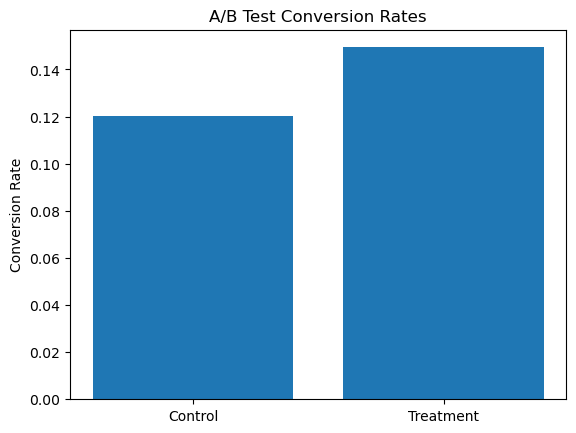

In [13]:
# Visualization

plt.figure()
plt.bar(["Control", "Treatment"], [p_control, p_treatment])
plt.ylabel("Conversion Rate")
plt.title("A/B Test Conversion Rates")
plt.show()


In [14]:
# Business impact estimation
uplift = p_treatment - p_control

monthly_users = 100000
expected_extra_conversions = uplift * monthly_users

uplift, expected_extra_conversions


(np.float64(0.02931150374495871), np.float64(2931.150374495871))

## Results

Treatment conversion rate was higher than control.

P-value < 0.05 → Statistically significant improvement.

Estimated uplift: 2.93%

Projected impact: +2931.15 additional monthly conversions.

## Recommendation

Roll out the new trading interface to all users.
Monitor retention and downstream revenue metrics.